## Cumsum dev using historical weekly results

In [67]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import os

In [12]:
os.chdir('/Users/ericitokazu/Documents/GT OMSA/CSE 6242/Project/historical_weekly')

In [86]:
files = os.listdir()
# files

In [87]:
tables = []

for f in files:
    if "20" in f:
        table = pd.read_csv(f)
        tables.append(table)

# tables

In [15]:
full_frame = pd.concat(tables)

In [16]:
len(full_frame)

81118

In [17]:
group_player = full_frame.groupby(['player_name', 'year', 'week'])[['player_name', 'year', 'week', 'half_ppr_points']]

In [18]:
group_player.head(20)

,player_name,year,week,half_ppr_points
0,Brandin Cooks,2016,1,30.4
1,A.J. Green,2016,1,30.0
2,Antonio Brown,2016,1,28.6
3,Willie Snead IV,2016,1,27.7
4,Larry Fitzgerald,2016,1,24.1
...,...,...,...,...
3955,Luke Willson,2013,17,0.9
3956,Richard Gordon,2013,17,0.8
3957,Jack Doyle,2013,17,0.7
3958,Danny Noble,2013,17,0.6


In [88]:
data_2022 = pd.read_csv('2022_weekly_data.csv')
# data_2022.head()

In [20]:
data_2022['pts_cumsum'] = data_2022.groupby('player_name')['half_ppr_points'].cumsum()

In [21]:
g = data_2022.groupby('player_name')
# g2 = g[g['player_name']=='Cooper Kupp']
# g.head(10)

,player_name,player_position,player_team,year,week,receptions,targets,receiving_yards,receiving_yards_per_reception,receiving_touchdowns,rushing_attempts,rushing_yards,rushing_yards_per_attempt,rushing_touchdowns,standard_points,half_ppr_points,ppr_points,pts_cumsum
0,Justin Jefferson,WR,MIN,2022,1,9,11,184,20.4,2,0,0,0.0,0,0.0,34.9,0.0,34.9
1,Cooper Kupp,WR,LAR,2022,1,13,15,128,9.8,1,0,0,0.0,0,0.0,25.3,0.0,25.3
2,Davante Adams,WR,LV,2022,1,10,17,141,14.1,1,0,0,0.0,0,0.0,25.1,0.0,25.1
3,Ja'Marr Chase,WR,CIN,2022,1,10,16,129,12.9,1,0,0,0.0,0,0.0,23.9,0.0,23.9
4,Michael Pittman Jr.,WR,IND,2022,1,9,13,121,13.4,1,0,0,0.0,0,0.0,22.6,0.0,22.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4286,James Mitchell,TE,DET,2022,18,1,1,7,7.0,0,0,0,0.0,0,0.0,1.2,0.0,22.8
4287,Parker Hesse,TE,ATL,2022,18,1,1,6,6.0,0,0,0,0.0,0,0.0,1.1,0.0,13.4
4289,Geoff Swaim,TE,ARI,2022,18,1,1,5,5.0,0,0,0,0.0,0,0.0,1.0,0.0,17.8
4291,Blake Bell,TE,KC,2022,18,1,1,3,3.0,0,0,0,0.0,0,0.0,0.8,0.0,9.0


In [22]:
players = data_2022['player_name'].unique()
# players

In [23]:
player_subsets = []
for player in players:
    indiv = data_2022[data_2022['player_name']==player]
    # indiv['points_cumsum'] = indiv['half_ppr_points'].cumsum()
    player_subsets.append(indiv)

len(player_subsets)

490

In [24]:
player_subsets[1].head()

,player_name,player_position,player_team,year,week,receptions,targets,receiving_yards,receiving_yards_per_reception,receiving_touchdowns,rushing_attempts,rushing_yards,rushing_yards_per_attempt,rushing_touchdowns,standard_points,half_ppr_points,ppr_points,pts_cumsum
1,Cooper Kupp,WR,LAR,2022,1,13,15,128,9.8,1,0,0,0.0,0,0.0,25.3,0.0,25.3
253,Cooper Kupp,WR,LAR,2022,2,11,14,108,9.8,2,0,0,0.0,0,0.0,26.3,0.0,51.6
521,Cooper Kupp,WR,LAR,2022,3,4,6,44,11.0,0,1,20,20.0,1,0.0,14.4,0.0,66.0
761,Cooper Kupp,WR,LAR,2022,4,14,19,122,8.7,0,0,0,0.0,0,0.0,19.2,0.0,85.2
997,Cooper Kupp,WR,LAR,2022,5,7,10,125,17.9,1,1,4,4.0,0,0.0,22.4,0.0,107.6


In [25]:
a = player_subsets[1]['pts_cumsum'].tolist()
a

[25.3, 51.6, 66.0, 85.2, 107.6, 120.8, 139.7, 162.5, 163.9]

In [26]:
subsets_filtered = [i for i in player_subsets if max(i['pts_cumsum'].tolist())<50]
len(subsets_filtered)

279

In [27]:
full_filt = pd.concat(subsets_filtered)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


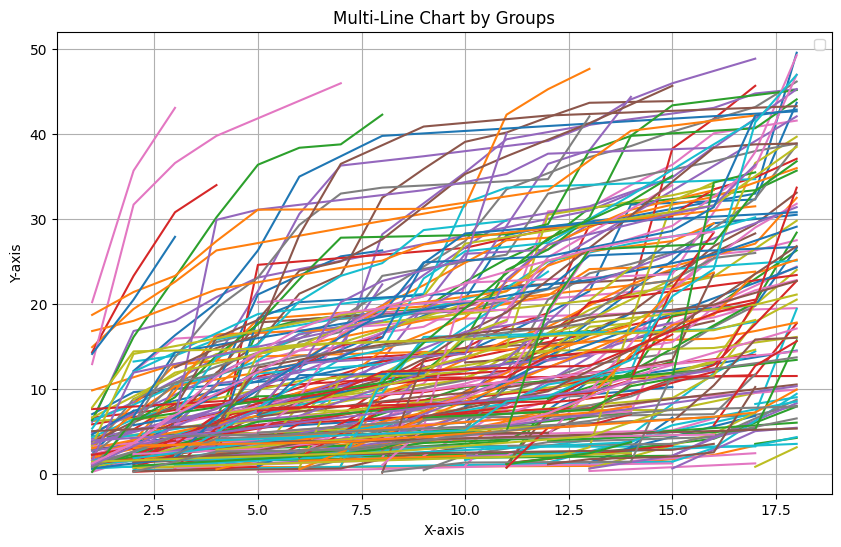

In [28]:
# plot cumsum for all players

# Group the data by the 'Group' column
grouped = full_filt.groupby('player_name')

# Create a multi-line chart
plt.figure(figsize=(10, 6))

for name, group in grouped:
    plt.plot(group['week'], group['pts_cumsum'])

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multi-Line Chart by Groups')
plt.legend()
plt.grid(True)
plt.show()

#### downselect to top 50 ranked players by cumsum

In [34]:
g2 = data_2022.copy()
g2['weekly_rank'] = g2.groupby('week')['pts_cumsum'].rank('dense', ascending=False)
g2.head(10)
g2.sort_values(['weekly_rank'], ascending=False).groupby('week')
top50 = g2.loc[g2['weekly_rank'] <= 50]
top50.head()

,player_name,player_position,player_team,year,week,receptions,targets,receiving_yards,receiving_yards_per_reception,receiving_touchdowns,rushing_attempts,rushing_yards,rushing_yards_per_attempt,rushing_touchdowns,standard_points,half_ppr_points,ppr_points,pts_cumsum,weekly_rank
0,Justin Jefferson,WR,MIN,2022,1,9,11,184,20.4,2,0,0,0.0,0,0.0,34.9,0.0,34.9,1.0
1,Cooper Kupp,WR,LAR,2022,1,13,15,128,9.8,1,0,0,0.0,0,0.0,25.3,0.0,25.3,4.0
2,Davante Adams,WR,LV,2022,1,10,17,141,14.1,1,0,0,0.0,0,0.0,25.1,0.0,25.1,5.0
3,Ja'Marr Chase,WR,CIN,2022,1,10,16,129,12.9,1,0,0,0.0,0,0.0,23.9,0.0,23.9,7.0
4,Michael Pittman Jr.,WR,IND,2022,1,9,13,121,13.4,1,0,0,0.0,0,0.0,22.6,0.0,22.6,8.0


In [41]:
top_50_avg = top50.groupby('week')['pts_cumsum'].mean().reset_index()
top_50_avg.head()

,week,pts_cumsum
0,1,16.935000
1,2,30.343103
2,3,43.109259
3,4,55.820370
4,5,70.171154


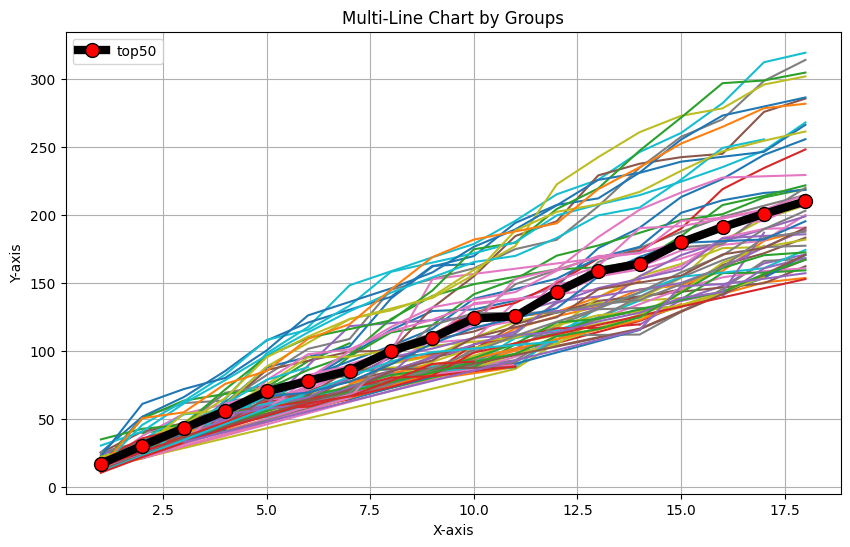

In [44]:
# df = pd.DataFrame(data)

# Group the data by the 'Group' column
grouped = top50.groupby('player_name')

# Create a multi-line chart
plt.figure(figsize=(10, 6))

for name, group in grouped:
    plt.plot(group['week'], group['pts_cumsum'])
plt.plot(top_50_avg['week'], top_50_avg['pts_cumsum'], label='top50', color='black', linewidth=6, marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multi-Line Chart by Groups')
plt.legend()
plt.grid(True)
plt.show()

#### downselect bubble line using players ranked 40-60

In [48]:
bubble = g2.loc[(g2['weekly_rank']<=60) & (g2['weekly_rank']>=40)]
bubble.head()

,player_name,player_position,player_team,year,week,receptions,targets,receiving_yards,receiving_yards_per_reception,receiving_touchdowns,rushing_attempts,rushing_yards,rushing_yards_per_attempt,rushing_touchdowns,standard_points,half_ppr_points,ppr_points,pts_cumsum,weekly_rank
23,Rashod Bateman,WR,BAL,2022,1,2,5,59,29.5,1,0,0,0.0,0,0.0,12.9,0.0,12.9,40.0
24,Terry McLaurin,WR,WAS,2022,1,2,4,58,29.0,1,0,0,0.0,0,0.0,12.8,0.0,12.8,41.0
25,Marquise Brown,WR,ARI,2022,1,4,6,43,10.8,1,0,0,0.0,0,0.0,12.3,0.0,12.3,42.0
26,Brandin Cooks,WR,DAL,2022,1,7,12,82,11.7,0,0,0,0.0,0,0.0,11.7,0.0,11.7,45.0
27,Dante Pettis,WR,FA,2022,1,1,1,51,51.0,1,0,0,0.0,0,0.0,11.6,0.0,11.6,46.0


In [59]:
bubble_avg = bubble.groupby('week')['pts_cumsum'].mean().reset_index()
bubble_avg.rename(columns={'pts_cumsum':'bubble_cumsum'}, inplace=True)
bubble_avg.head()

,week,bubble_cumsum
0,1,10.700000
1,2,21.184615
2,3,32.038462
3,4,42.556000
4,5,52.747826


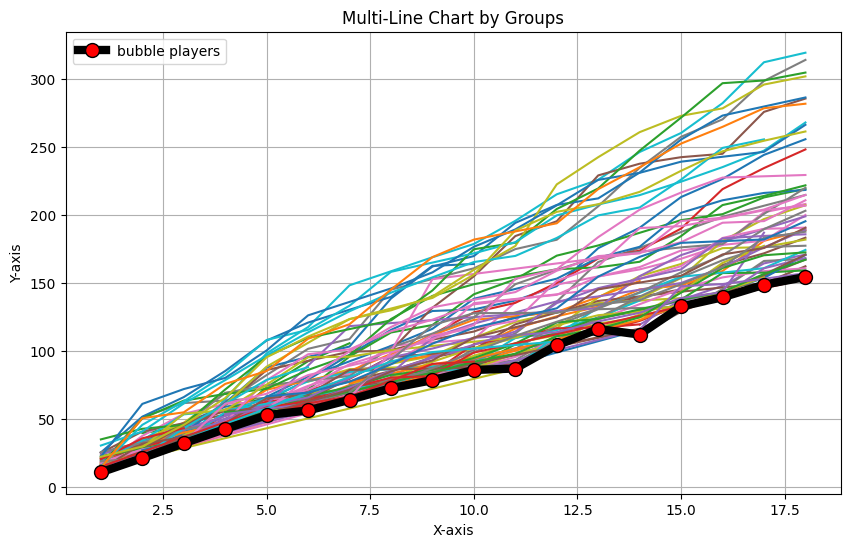

In [60]:
# Group the data by the 'Group' column
grouped = top50.groupby('player_name')

# Create a multi-line chart
plt.figure(figsize=(10, 6))

for name, group in grouped:
    plt.plot(group['week'], group['pts_cumsum'])
plt.plot(bubble_avg['week'], bubble_avg['bubble_cumsum'], label='bubble players', color='black', linewidth=6, marker='o', markerfacecolor='red', markersize=10)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Multi-Line Chart by Groups')
plt.legend()
plt.grid(True)
plt.show()

#### flag 'breakout' players if cusum differential is greater than 1 stdev of weekly pts scored by bubble players

In [68]:
bubble_pts_std = bubble['half_ppr_points'].std()

In [69]:
player_check = g2.merge(bubble_avg, on='week', how='inner')
player_check['cumsum_diff'] = player_check['pts_cumsum'] - player_check['bubble_cumsum']
player_check['breakout'] = np.where(player_check['cumsum_diff']>bubble_pts_std, 1, 0)
player_check.head()

,player_name,player_position,player_team,year,week,receptions,targets,receiving_yards,receiving_yards_per_reception,receiving_touchdowns,...,rushing_yards_per_attempt,rushing_touchdowns,standard_points,half_ppr_points,ppr_points,pts_cumsum,weekly_rank,bubble_cumsum,cumsum_diff,breakout
0,Justin Jefferson,WR,MIN,2022,1,9,11,184,20.4,2,...,0.0,0,0.0,34.9,0.0,34.9,1.0,10.7,24.2,1
1,Cooper Kupp,WR,LAR,2022,1,13,15,128,9.8,1,...,0.0,0,0.0,25.3,0.0,25.3,4.0,10.7,14.6,1
2,Davante Adams,WR,LV,2022,1,10,17,141,14.1,1,...,0.0,0,0.0,25.1,0.0,25.1,5.0,10.7,14.4,1
3,Ja'Marr Chase,WR,CIN,2022,1,10,16,129,12.9,1,...,0.0,0,0.0,23.9,0.0,23.9,7.0,10.7,13.2,1
4,Michael Pittman Jr.,WR,IND,2022,1,9,13,121,13.4,1,...,0.0,0,0.0,22.6,0.0,22.6,8.0,10.7,11.9,1


In [82]:
breakouts = player_check.loc[player_check['breakout']==1]
breakouts.drop_duplicates(subset=['player_name'], keep='first', inplace=True)
breakouts.head()

/var/folders/17/sztph0j97vlc01psv6fx0x600000gn/T/ipykernel_61233/3438705635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breakouts.drop_duplicates(subset=['player_name'], keep='first', inplace=True)


,player_name,player_position,player_team,year,week,receptions,targets,receiving_yards,receiving_yards_per_reception,receiving_touchdowns,...,rushing_yards_per_attempt,rushing_touchdowns,standard_points,half_ppr_points,ppr_points,pts_cumsum,weekly_rank,bubble_cumsum,cumsum_diff,breakout
0,Justin Jefferson,WR,MIN,2022,1,9,11,184,20.4,2,...,0.0,0,0.0,34.9,0.0,34.9,1.0,10.7,24.2,1
1,Cooper Kupp,WR,LAR,2022,1,13,15,128,9.8,1,...,0.0,0,0.0,25.3,0.0,25.3,4.0,10.7,14.6,1
2,Davante Adams,WR,LV,2022,1,10,17,141,14.1,1,...,0.0,0,0.0,25.1,0.0,25.1,5.0,10.7,14.4,1
3,Ja'Marr Chase,WR,CIN,2022,1,10,16,129,12.9,1,...,0.0,0,0.0,23.9,0.0,23.9,7.0,10.7,13.2,1
4,Michael Pittman Jr.,WR,IND,2022,1,9,13,121,13.4,1,...,0.0,0,0.0,22.6,0.0,22.6,8.0,10.7,11.9,1


In [83]:
len(breakouts)

87

<Axes: xlabel='week'>

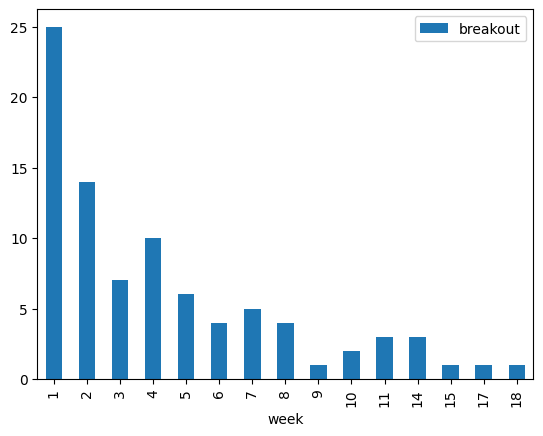

In [85]:
breakout_counts = breakouts.groupby('week').count().reset_index()
breakout_counts.plot.bar(x='week', y='breakout')